In [1]:
print("hello world")

hello world


## Instagram is one of the most popular social media application today. Various users use Instagram for their daily purpose while some use for business, content creation, companies use Instagram to market their data. Instagram keeps on changing itself to make it better but these frequent changes affects content creators and users. **These changes affects a post reach and hence we're running this analysis so that a content creator or any user can find out its post reach.**

## We will use a random user instagram dataset for this analysis. Now lets start analyzing

In [2]:
#first we will import important libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor


In [3]:
data = pd.read_csv("Instagram data.csv", encoding='latin1')
data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [4]:
#lets see first 10 rows for better understanding of data
data.head(10)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
5,3884,2046,1214,329,43,74,7,10,144,9,2,Here are some of the most important soft skill...,#data #datascience #dataanalysis #dataanalytic...
6,2621,1543,599,333,25,22,5,1,76,26,0,Learn how to analyze a candlestick chart as a ...,#stockmarket #investing #stocks #trading #mone...
7,3541,2071,628,500,60,135,4,9,124,12,6,Here are some of the best books that you can f...,#python #pythonprogramming #pythonprojects #py...
8,3749,2384,857,248,49,155,6,8,159,36,4,Here are some of the best data analysis projec...,#dataanalytics #datascience #data #machinelear...
9,4115,2609,1104,178,46,122,6,3,191,31,6,Here are two best ways to count the number of ...,#python #pythonprogramming #pythonprojects #py...


### First we will check for any null values

In [5]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

## if there are null values in the data then use data.dropna() for removing all null values

### lets have a look towards insights for the column

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


# Lets Analyze
## Analyzing Instagram Reach


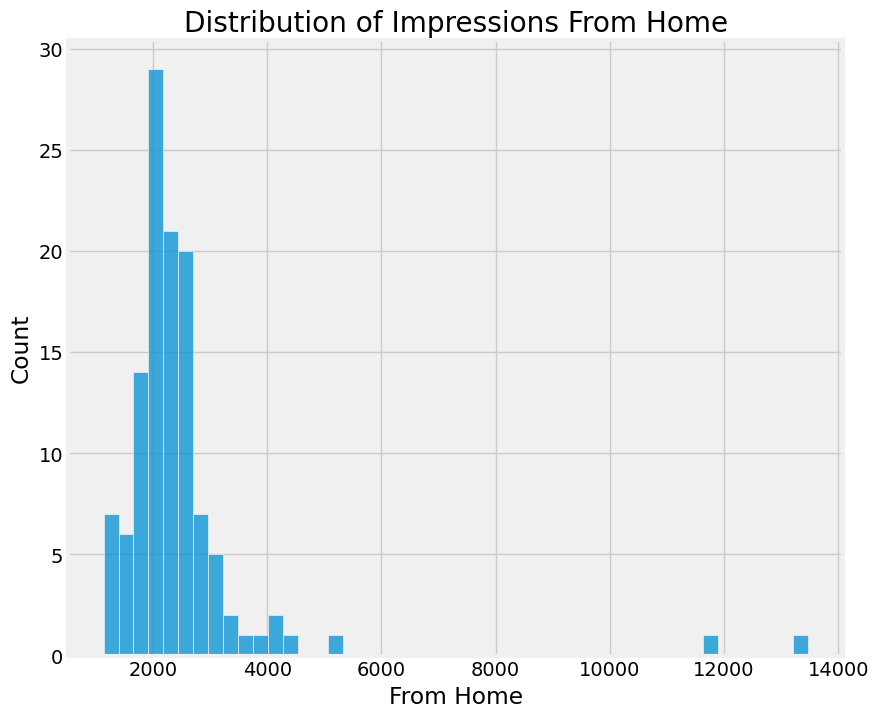

In [7]:
# first I will look towards distribution of impressions received from home

plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.histplot(data['From Home'])
plt.show()

## From above graph its clear that its hard to reach the followers daily.

## lets have a look from hashtags

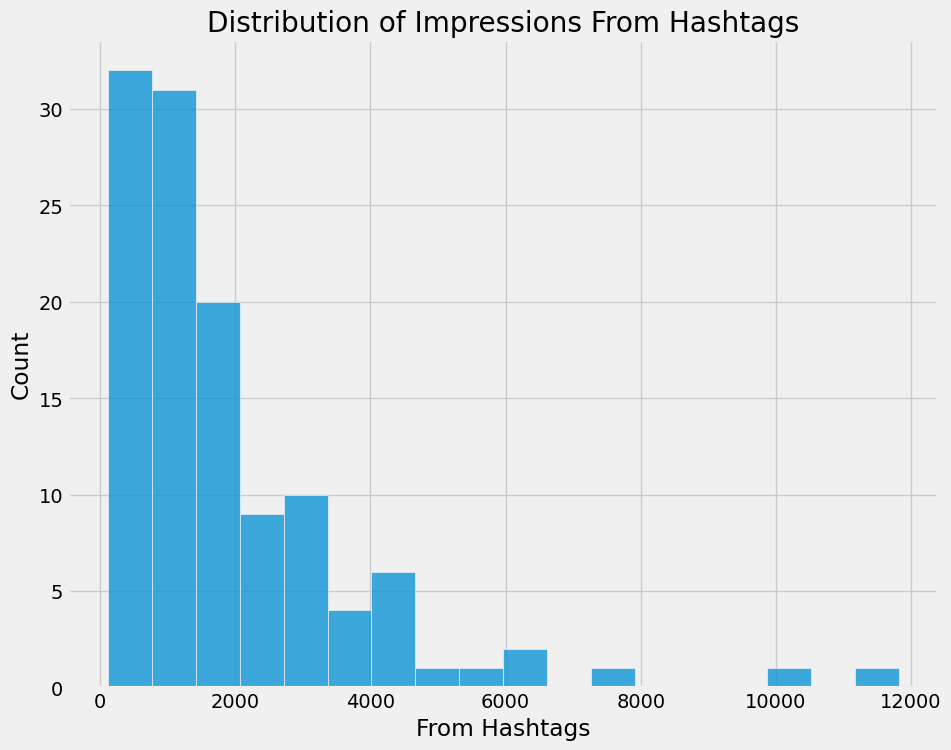

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(data['From Hashtags'])
plt.show()

## we use hashtags to categorize the post on instagram so as to reach more users based on the content

### ***Looking above graph not all post can be reached from hashtags***

### Now its time for explore

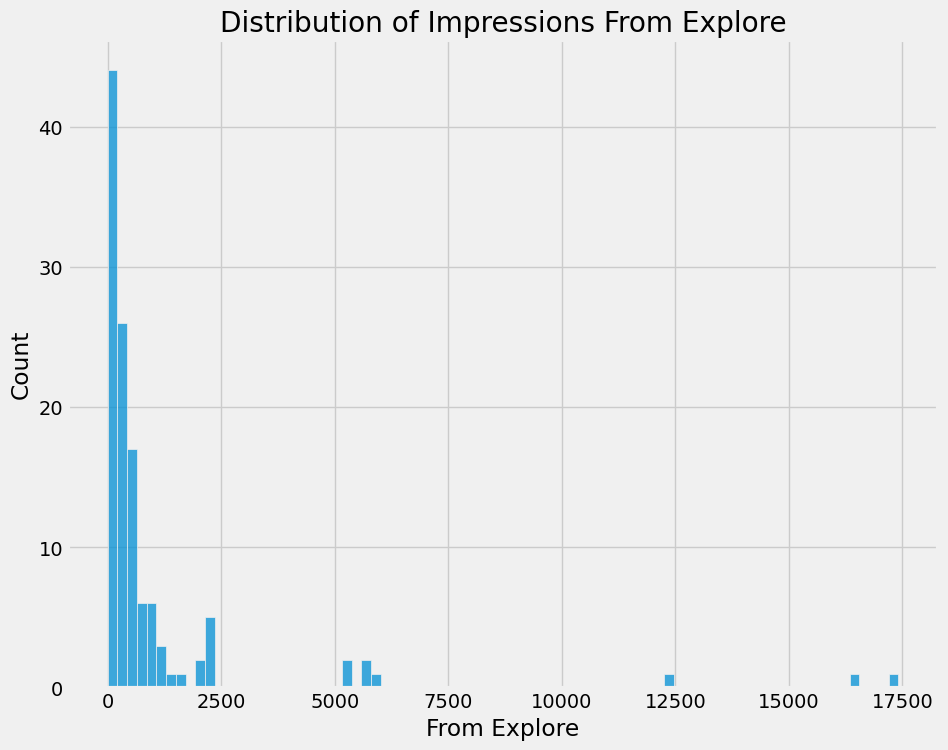

In [9]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Explore")
sns.histplot(data["From Explore"])
plt.show()

## Explore section gives us recommendation based on our preferences and interests. By looking at the above graph instagram does not recommend our post to much to users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach user receive from hashtags.

## Now lets look at percentage of impressions I get from various sources on Instagram

In [10]:
home = data['From Home'].sum()
hashtags = data['From Hashtags'].sum()
explore = data['From Explore'].sum()
other = data['From Other'].sum()

labels= ['From Home','From Hashtags','From Explore','Other']
values=[home,hashtags,explore,other]

fig = px.pie(data,values=values,names=labels,title="Impressions on Instagram posts From Various sources",hole=0.5)
fig.show()

## The pie diagram shows almost 50% of the post reach is from my followers 33.6% from hashtags 19.2% from explore and the very least is from other with 3.05%

# Analyzing content

### lets analyze the content of my instagram posts. The dataset has two columns, namely caption and hashtags which will help us understand the content user post

### will create a wordcloud for most words used

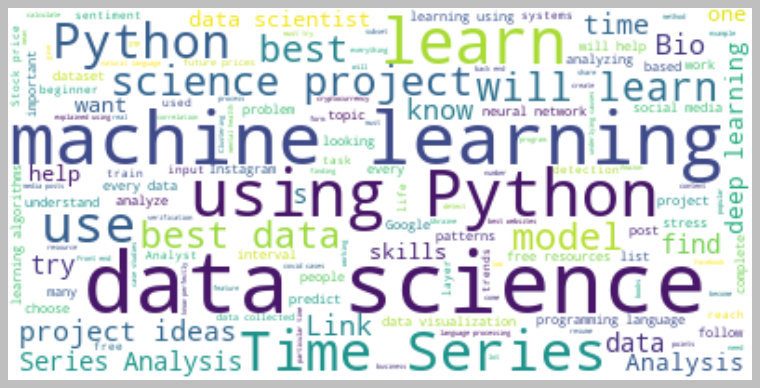

In [11]:
text=' '.join(i for i in data['Caption'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## simple wordcloud in black background 

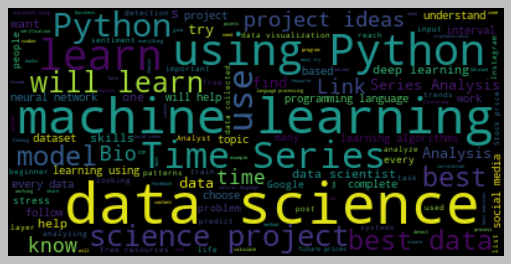

In [12]:

wc=WordCloud(background_color="black").generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

### lets create wordcloud for hashtags

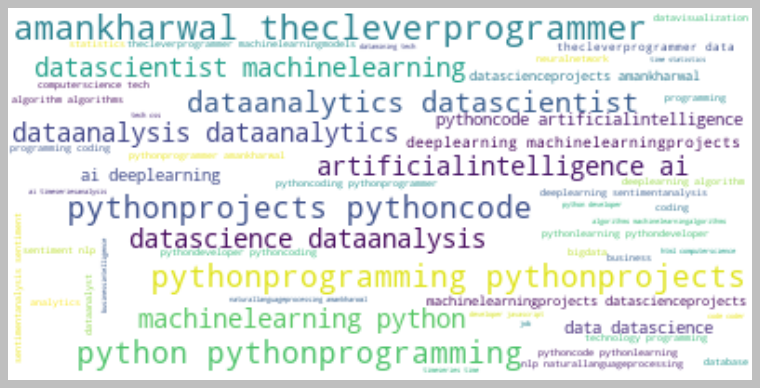

In [13]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyzing relationships

## Now lets analyze to find most important factor for impressions
### For this will take scatter plot of Impressions vs other factors

### First is Likes vs impressions

In [14]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [15]:
figure = px.scatter(data_frame=data,x='Likes',y='Impressions',size='Impressions',trendline="ols",title="Relationship between likes and Impression")
figure.show()

## Theres a linear relationship between Impressions and Likes and hence Likes is a significant factor for Impressions

### Now lets look relationship between comments and Impressions

In [16]:
figure = px.scatter(data_frame=data,x='Comments',y='Impressions',title="Relationship between comments and Impressions",trendline="ols")
figure.show()

### It looks like number of comments we get on a post does not affect the reach of the post.

### Now lets look at the relationship between number of shares and impressions

In [17]:
figure = px.scatter(data_frame=data,x='Shares',y="Impressions",title="Relationship between Shares and Impressions",trendline="ols")
figure.show()

### There is a positive relationship between shares and impressions.
### It means more number of shares means more number of Impressions

### Now lets look at relationship between number of saves and impressions

In [18]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [19]:
figure = px.scatter(data_frame=data,x='Saves',y='Impressions',trendline="ols",title="Relationship between Saves and Impressions")
figure.show()

### There is a linear relationship between the number of times my post is saved and the reach of my Instagram post.

### Now lets look at the coorelation of all columns with Impressions columns

In [20]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [21]:
selected_columns=['Impressions','Likes','From Hashtags','Follows','Profile Visits','Saves','From Home','From Explore','Shares','From Other','Comments']

correlation = data[selected_columns].corr()
correlation["Impressions"]

Impressions       1.000000
Likes             0.849835
From Hashtags     0.560760
Follows           0.889363
Profile Visits    0.760981
Saves             0.779231
From Home         0.844698
From Explore      0.893607
Shares            0.634675
From Other        0.592960
Comments         -0.028524
Name: Impressions, dtype: float64

### From above correlation matrix we can take insight that
### 1 shares and saves have high relation with impression 
### 2 It means higher number of shares will help us to get more reach on Instagram.

# Analyzing Conversion Rate

### In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100.

### Now lets calculate conversion rate

In [22]:
conversion_rate=(data['Follows'].sum()/data['Profile Visits'].sum())*100
conversion_rate

41.00265604249668

### the conversion rate of the user account is 41% which is pretty good conversion rate.

### Lets analyze the relationship between total profile visits and number of flowers gained from all profile visits:

In [23]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [24]:
figure = px.scatter(data_frame=data,x='Profile Visits',y='Follows',size='Follows',trendline='ols',title="Relationship Between Profile Visits and Followers Gained")
figure.show()

### From the above graph there is a linear relationship between Profile visits and Follows

# Instagram Reach Prediction model

## Here I will train a machine-learning model to predict the reach of an Instagram post

### Let's split the data into training and test sets to train our model:

In [25]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

### Lets make our model using train and test data to predict the reach of an Instagram post 

In [26]:
model = PassiveAggressiveRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8067050160678375

## Now let's predict the reach of an Instagram post by giving inputs to machine learning model:

In [27]:
# Features = [['Likes','Saves','Comments','Shares','Profile Visits','Follows']]
features = np.array([[282.0,233.0,4.0,9.0,165.0,54.0]])
model.predict(features)

array([10127.20708659])

# Conclusion
### So this is how you can analyze and predict the reach of Instagram posts with machine learning using Python. If a user wants to do well on Instagram in the long run, they have to look at the data of their Instagram reach. That is where the use of Data Science in social media comes in.